<font color="yellow" size="6">Outliers</font>
<p><font color="GREEN" size="4">2.Local Outlier Factor (LOF)</font>

The Local Outlier Factor (LOF) algorithm is another popular method for detecting outliers. It is an unsupervised technique that identifies points in a dataset that have a significantly lower density compared to their neighbors. This makes LOF particularly useful for detecting local outliers in a dataset where outliers may not be global but rather localized in specific regions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [4]:
# Standardize the data (LOF is sensitive to feature scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


LOF Model: We initialize the LocalOutlierFactor model with n_neighbors=20 (this defines the number of neighbors to consider) and contamination=0.05 (which specifies that we expect 5% of the data to be outliers).

In [5]:
# Initialize the LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # n_neighbors: number of neighbors to use for LOF calculation


In [6]:
# Fit the LOF model and predict outliers
y_pred = lof.fit_predict(X_scaled)

Prediction: The fit_predict method identifies outliers, and LOF assigns -1 for outliers and 1 for inliers. We count the number of outliers detected.

In [7]:
# LOF assigns -1 for outliers and 1 for inliers
outliers = y_pred == -1
print(f"Number of outliers detected: {np.sum(outliers)}")

Number of outliers detected: 8


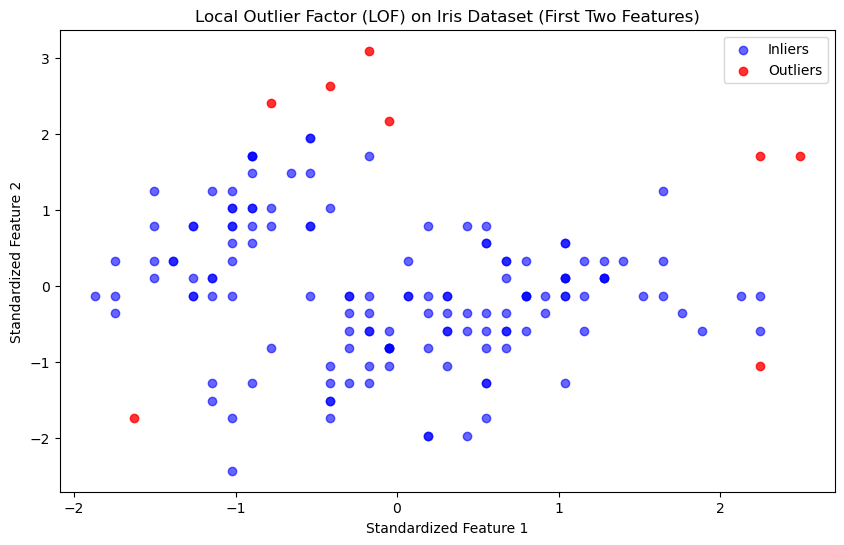

In [8]:
# Visualize the first two features to see how the outliers are detected
plt.figure(figsize=(10, 6))

# Plot inliers (points classified as 1)
plt.scatter(X_scaled[~outliers, 0], X_scaled[~outliers, 1], color='blue', label='Inliers', alpha=0.6)

# Plot outliers (points classified as -1)
plt.scatter(X_scaled[outliers, 0], X_scaled[outliers, 1], color='red', label='Outliers', alpha=0.8)

plt.xlabel('Standardized Feature 1')
plt.ylabel('Standardized Feature 2')
plt.legend()
plt.title('Local Outlier Factor (LOF) on Iris Dataset (First Two Features)')
plt.show()

PCA METHOD DIMENSIONALITY REDUCTION AND FIND OUTLIER

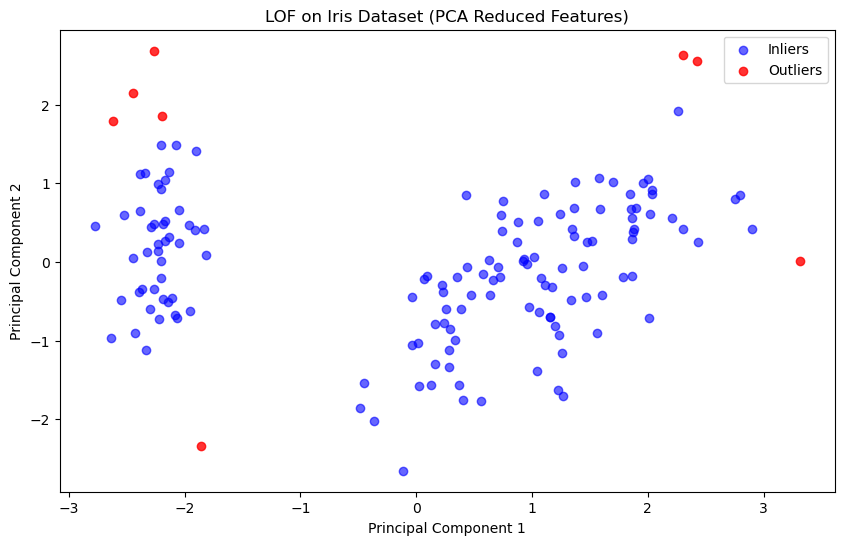

In [9]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the result in the reduced 2D space
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[~outliers, 0], X_pca[~outliers, 1], color='blue', label='Inliers', alpha=0.6)
plt.scatter(X_pca[outliers, 0], X_pca[outliers, 1], color='red', label='Outliers', alpha=0.8)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('LOF on Iris Dataset (PCA Reduced Features)')
plt.show()
